In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Difference of Gaussians

## Gaussian filter

\begin{equation*}
G(x,y) = 
\frac{1}{2\pi\sigma^2}
.e^{-\frac{x^2+y^2}{2\sigma^2}}
\end{equation*}

Example: Generate Gaussian 3x3 kernel with 
\begin{equation*}
\sigma = 1
\end{equation*}:

\begin{equation*}
\begin{bmatrix}
\ h(-1,-1) & h(0,-1) & h(1,-1) \\
\ h(-1,0) & h(0,0) & h(1,0) \\
\ h(-1,1) & h(0,1) & h(1,1) \
\end{bmatrix}
=
\begin{bmatrix}
\ 0.059 & 0.097 & 0.059 \\
\ 0.097 & 0.159 & 0.097 \\
\ 0.059 & 0.097 & 0.059 \
\end{bmatrix}
\end{equation*}

In [2]:
def genGaussKernel(height=3, width=3, sigma=1):
    c = 1.0 / (2 * np.pi * (sigma ** 2))
    center_h = (int)(height / 2)
    center_w = (int)(width / 2)
    kernel = np.ones((height, width))
    for i in range(height):
        for j in range(width):
            diff = (i - center_h)**2 + (j - center_w)**2
            kernel[i,j] = c * np.exp(-(diff) / (2.0*sigma**2))
    
    return kernel / kernel.sum()

Compare with above example:

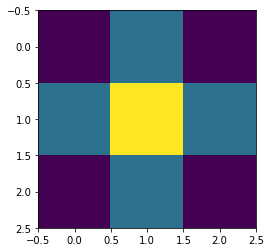

In [3]:
example_kernel = genGaussKernel()
plt.imshow(example_kernel)

In [4]:
print(example_kernel)

[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


## Gaussian blur

<u>Note:</u> Convolution 2D
<br>
Apply function <i><strong>filter2D(src, ddepth, kernel)</strong></i> of opencv
<br>
Arguments:
- The first argument is the source image
- The second argument is ddepth, which indicates the depth of the resulting image. A value of -1 indicates that the final image will also have the same depth as the source image
- The final input argument is the kernel, which we apply to the source image

In [5]:
def gaussianBlur(image, kernel_height, kernel_width, sigma):
    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return cv2.filter2D(img_gray, -1, genGaussKernel(kernel_height, kernel_width, sigma))

Example with input image:

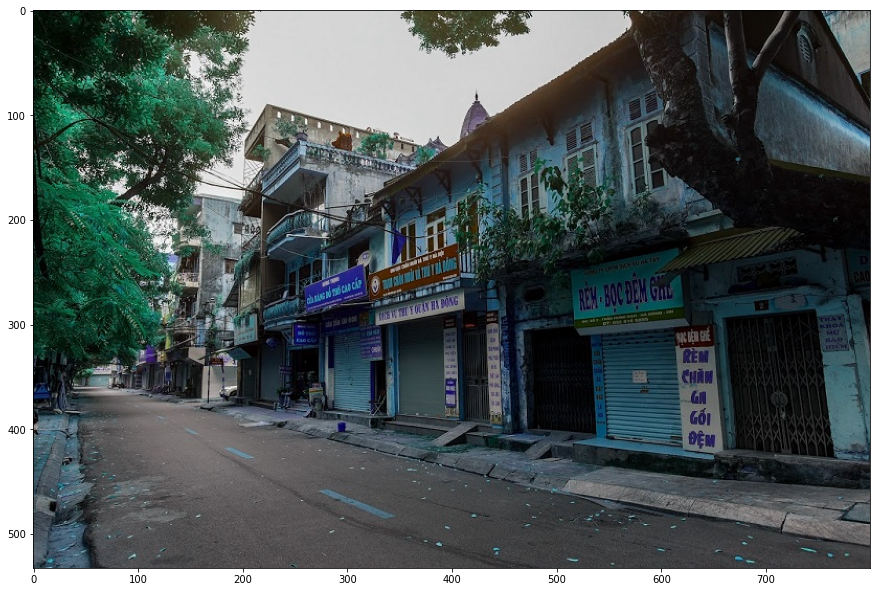

In [6]:
img = cv2.imread("../hanoi.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img)

Blur with 3x3 kernel, <strong>sigma = 0.7</strong>

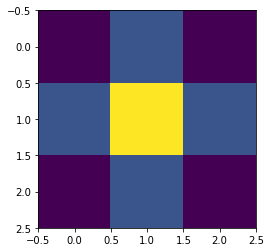

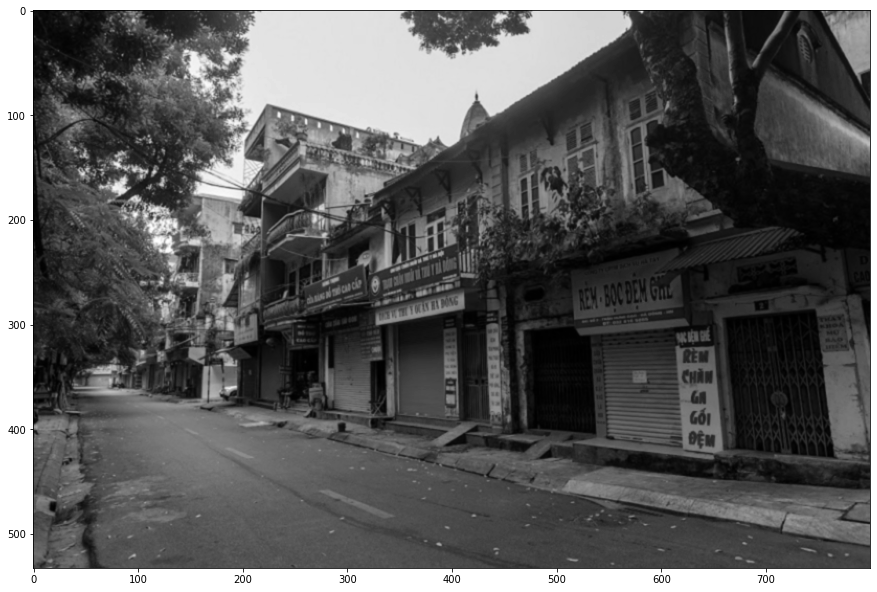

In [7]:
kernel_1 = genGaussKernel(3, 3, 0.7)
plt.imshow(kernel_1)

blur_img_1 = gaussianBlur(img, 3, 3, 0.7)
plt.figure(figsize=(15, 15))
plt.imshow(blur_img_1, cmap='gray')

Blur with 3x3 kernel, <strong>sigma = 1.4</strong>

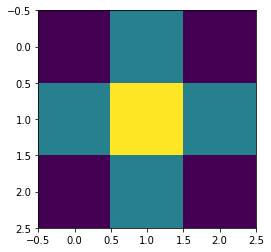

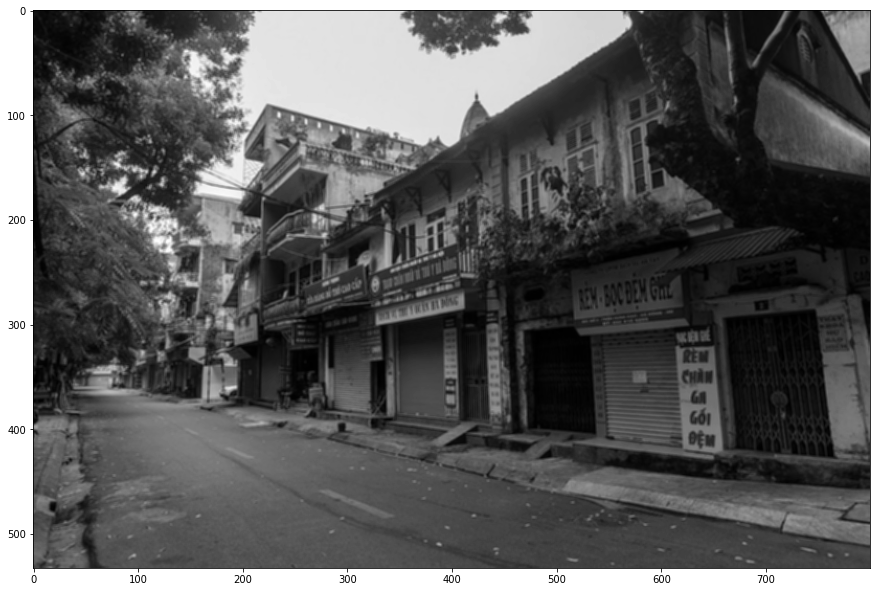

In [8]:
kernel_2 = genGaussKernel(3, 3, 1.4)
plt.imshow(kernel_2)

blur_img_2 = gaussianBlur(img, 3, 3, 1.4)
plt.figure(figsize=(15, 15))
plt.imshow(blur_img_2, cmap='gray')

## Difference of Gaussians
The DoG filter is created by subtracting two Gaussian functions of different sigmas
<br>
Difference of Gaussians image = low sigma image - high sigma image

In [9]:
def differenceOfGaussians(image, kernel_height, kernel_width, low_sigma, high_sigma):
    low_sigma_img = gaussianBlur(image, kernel_height, kernel_width, low_sigma)
    high_sigma_img = gaussianBlur(image, kernel_height, kernel_width, high_sigma)
    img_DoG = low_sigma_img - high_sigma_img
    
    plt.figure(figsize=(8, 8))
    plt.title("DoG with sigma = ({},{})".format(low_sigma, high_sigma))
    plt.imshow(img_DoG, cmap='gray')

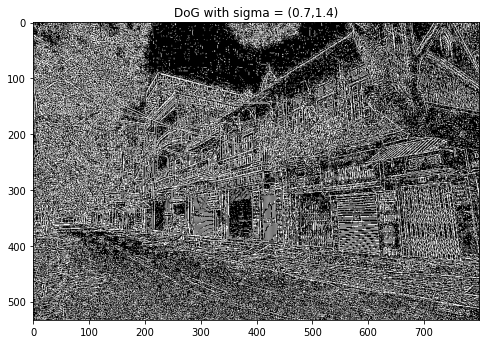

In [10]:
differenceOfGaussians(img, 3, 3, 0.7, 1.4)

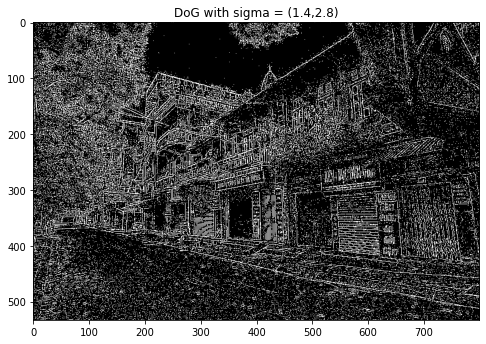

In [11]:
differenceOfGaussians(img, 3, 3, 1.4, 2.8)

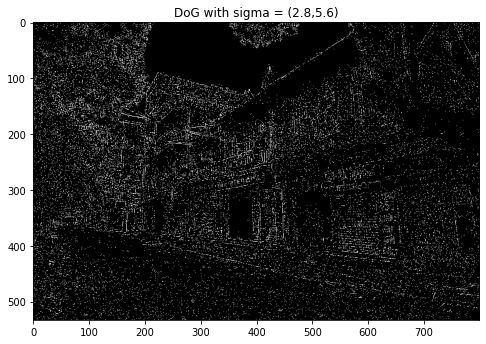

In [12]:
differenceOfGaussians(img, 3, 3, 2.8, 5.6)